# Simple Audio Processing

In [237]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import wavfile as wav
import wave

In [238]:
SOUND_FILE = 'datasets/spacebar-6x-16bit.wav'

## File input

In [307]:
def wav_read(filename):
    """Return 1D NumPy array of wave-formatted audio data denoted by filename.
    
    Input should be a string containing the path to a wave-formatted audio file.
    File should be uncompressed 16-bit."""
    sample_rate, data_2d = wav.read(filename)
    data_1d = [val for val, _ in data_2d]
    return np.array(data_1d)


spacebar_6x = wav_read(SOUND_FILE)
spacebar_6x

array([27, 24, 14, ...,  0,  0,  0], dtype=int16)

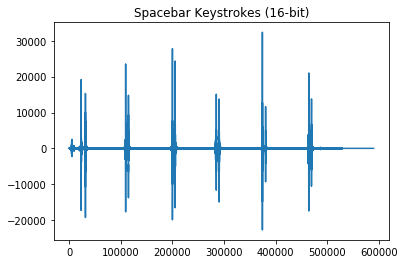

In [253]:
%matplotlib inline
plt.title('Spacebar Keystrokes (16-bit)')
plt.plot(spacebar_6x)
plt.show()

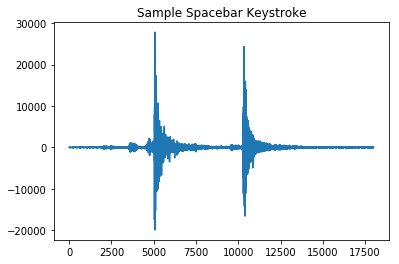

In [254]:
sample_keystroke = spacebar_6x[195000:213000]
plt.title('Sample Spacebar Keystroke')
plt.plot(sample_keystroke)
plt.show()

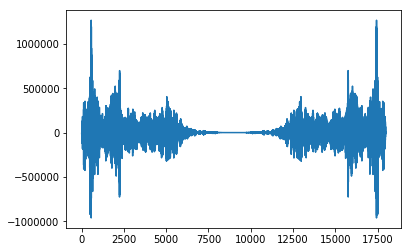

In [255]:
# Fourier Attempt
fourier_data = np.fft.fft(sample_keystroke)
plt.plot(fourier_data)
plt.show()

## Keystroke extraction

In [302]:
def extract_keystrokes(sound_data):
    """Return a list of NumPy arrays denoting each keystroke detected in the sound_file.
    
    Each keystroke consists of a push peak (touch peak and hit peak) and a release peak.
    The keystroke audio should begin right as the push peak begins.
    
    
    :type sound_file  -- NumPy array denoting input sound clip
    :type sample_rate -- integer denoting sample rate (samples per second)
    :rtype            -- NumPy array of NumPy arrays
    """
    silence_threshold  = 2500  # values less than this are considered random noise
    keystroke_duration = 0.17  # seconds
    sample_rate        = 44100 # Hz
    sample_length      = int(sample_rate * keystroke_duration)
    
    keystrokes = []
    i = 0
    while i < len(sound_data):
        if abs(sound_data[i]) > silence_threshold:
            sample_start, sample_end = i, i + sample_length
            keystroke = sound_data[sample_start:sample_end]
            keystrokes.append(keystroke)
            i = sample_end - 1
        i += 1
    return np.array(keystrokes)


def test_extract_keystrokes(data, expect):
    """Test if extract_keystrokes() extracts the correct number of keystrokes."""
    keystrokes = extract_keystrokes(data)
    actual = len(keystrokes)
    assert expect == actual, f"Detected keystrokes mismatch. Found {actual} instead of {expect}."
    print("Number of keystrokes matched!")

In [305]:
spacebar_10x = wav_read('datasets/spacebar-10x-16bit.wav')
test_extract_keystrokes(spacebar_10x, 10)

real_sample = wav_read('datasets/real-sample-23chars.wav')
test_extract_keystrokes(real_sample, 23)

spacebar_training = wav_read('datasets/spacebar-100a.wav')
test_extract_keystrokes(spacebar_training, 100)

Number of keystrokes matched!
Number of keystrokes matched!


AssertionError: Detected keystrokes mismatch. Found 124 instead of 100.

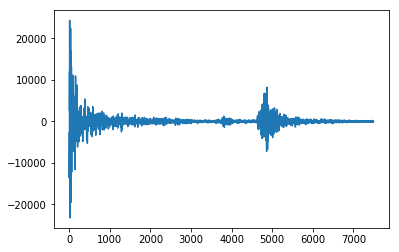

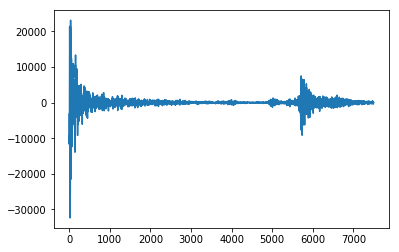

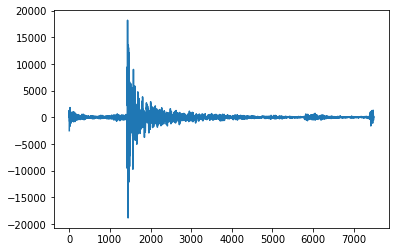

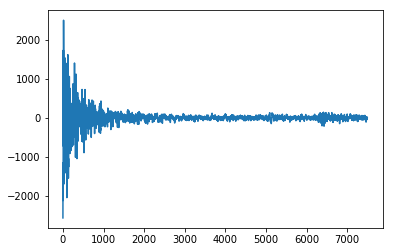

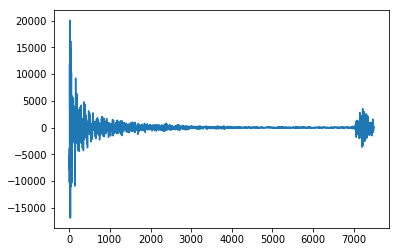

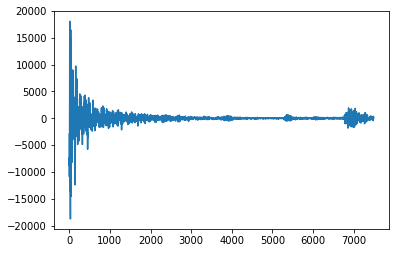

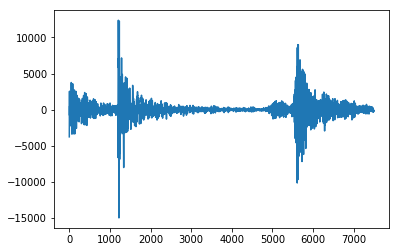

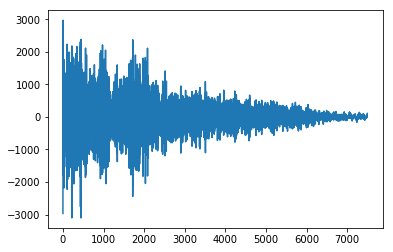

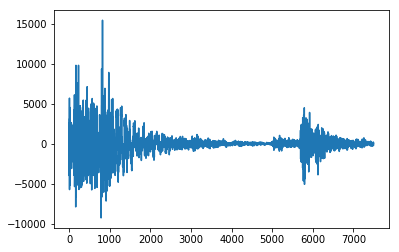

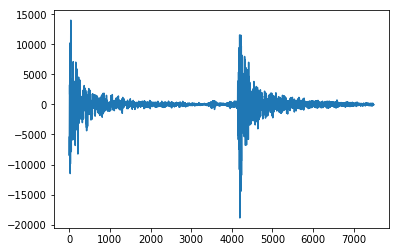

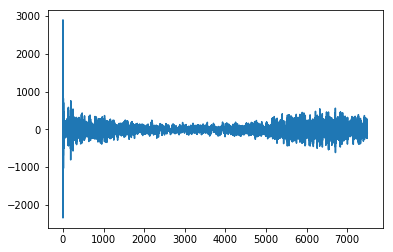

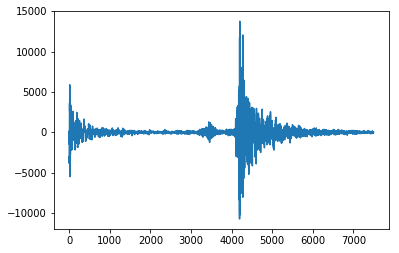

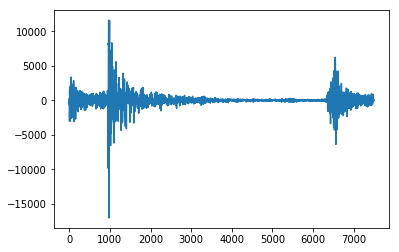

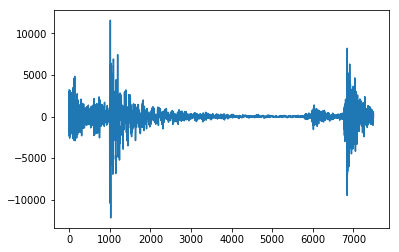

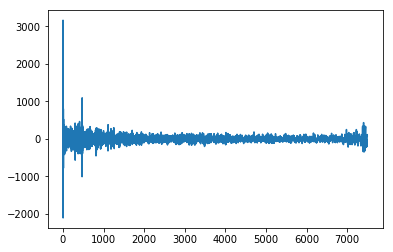

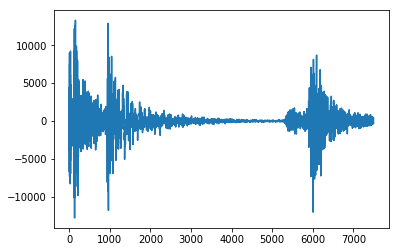

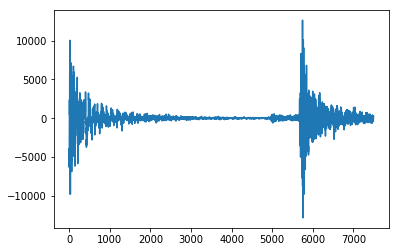

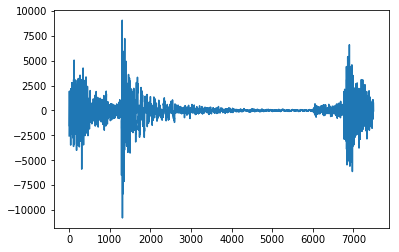

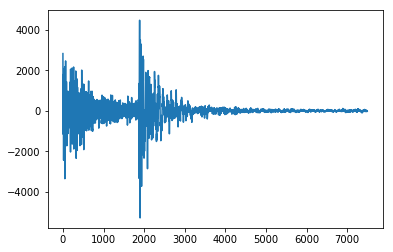

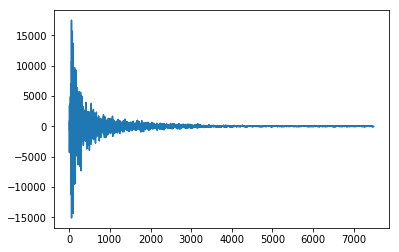

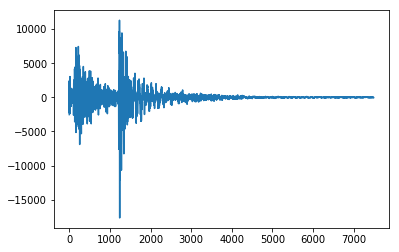

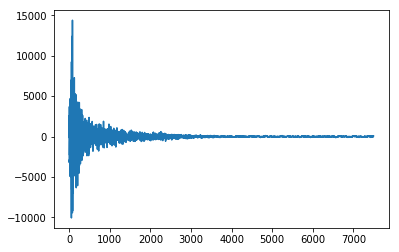

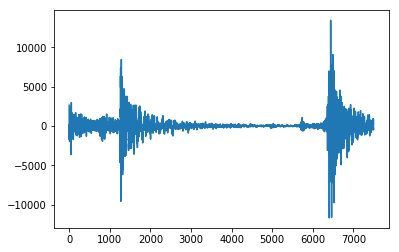

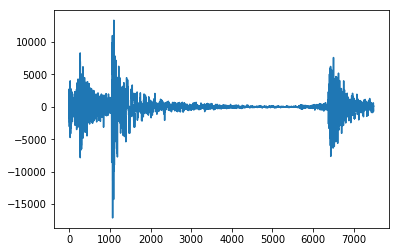

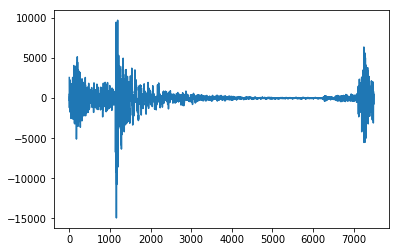

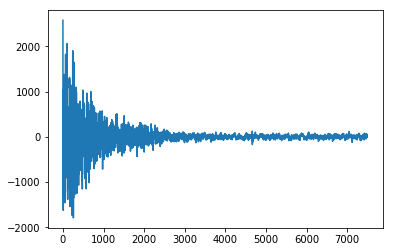

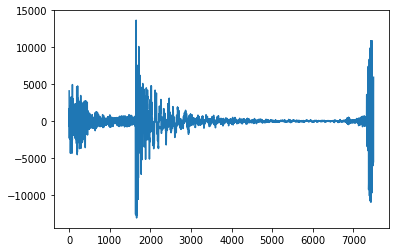

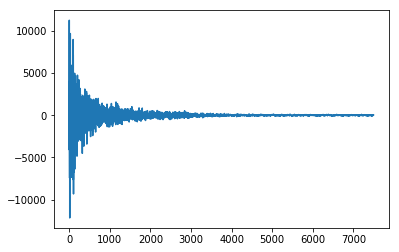

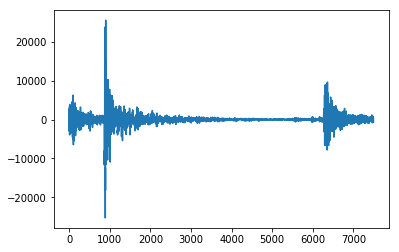

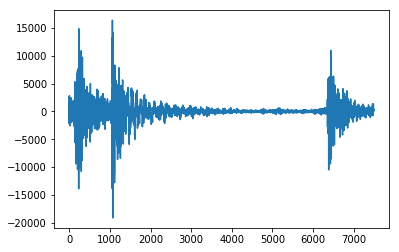

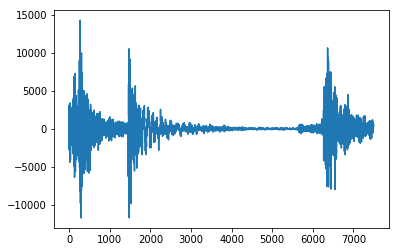

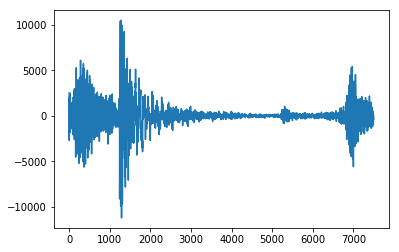

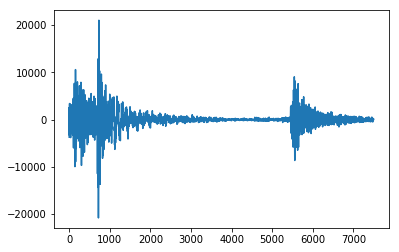

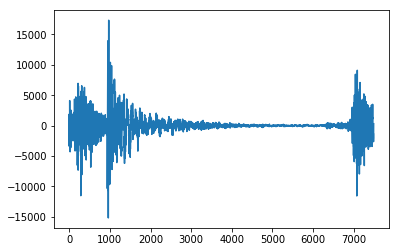

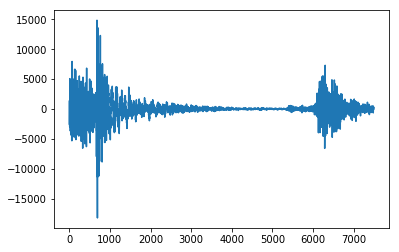

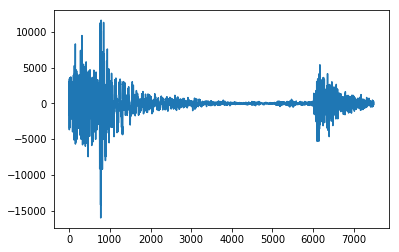

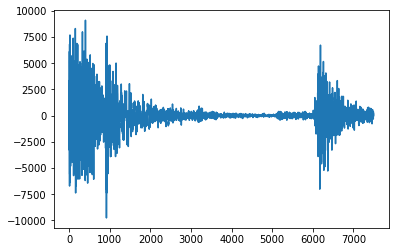

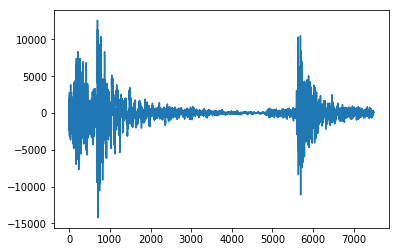

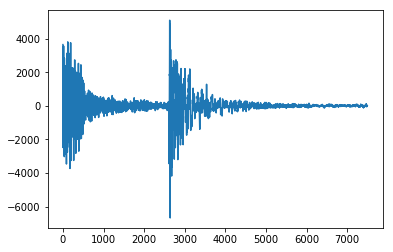

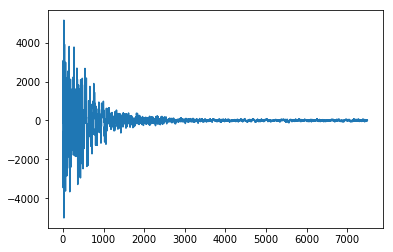

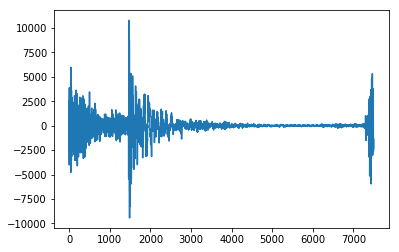

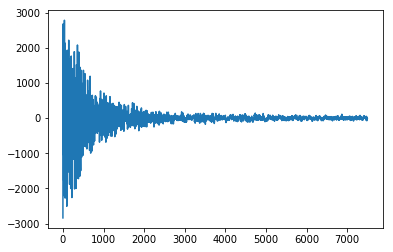

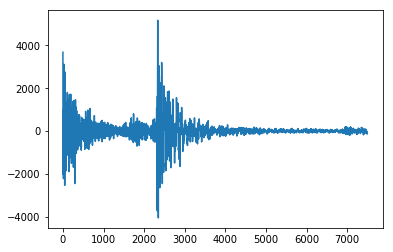

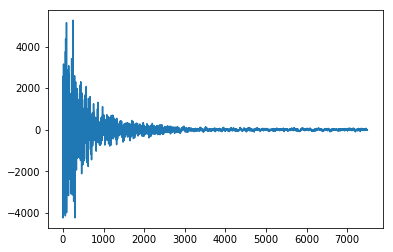

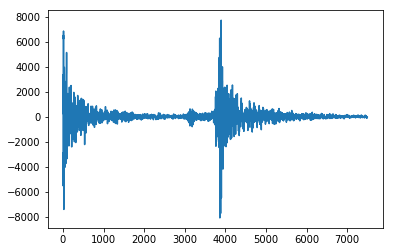

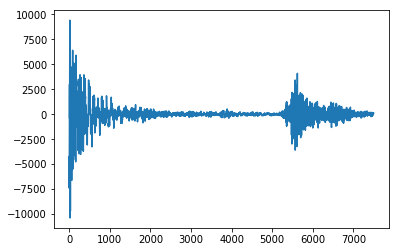

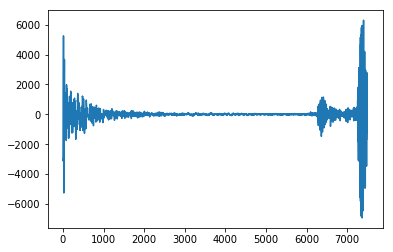

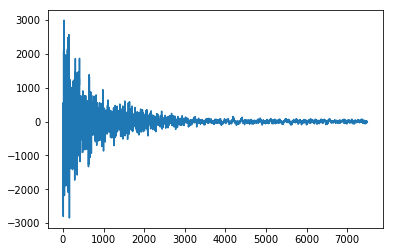

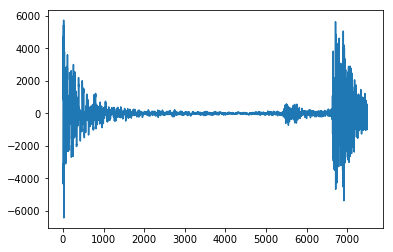

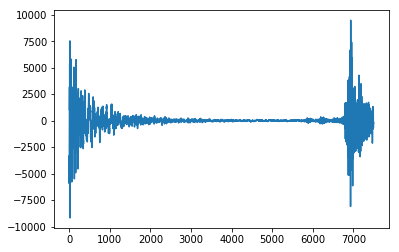

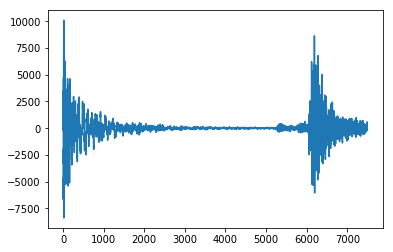

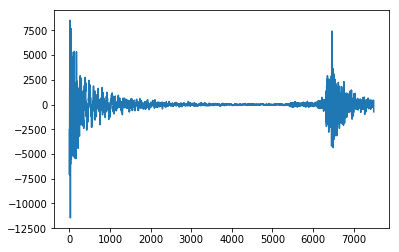

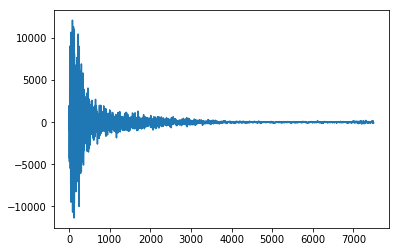

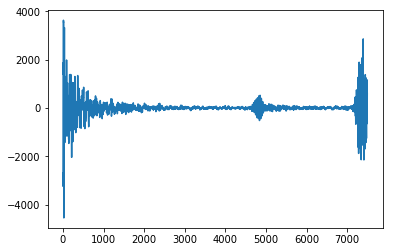

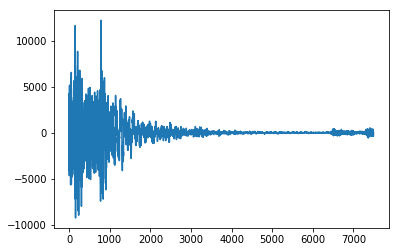

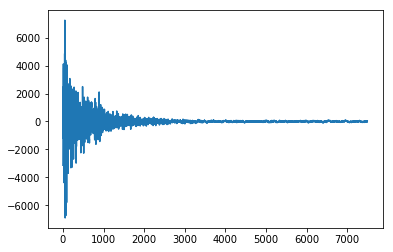

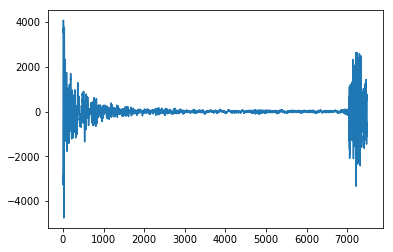

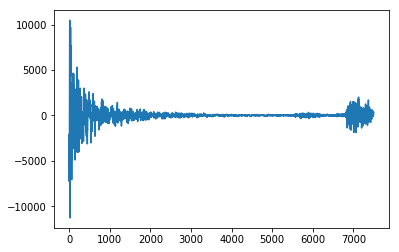

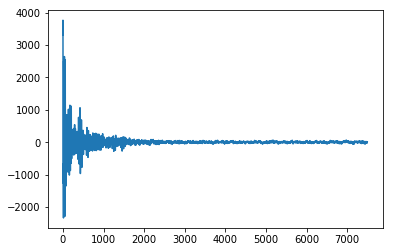

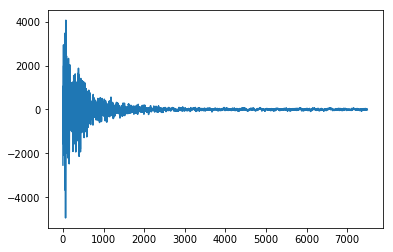

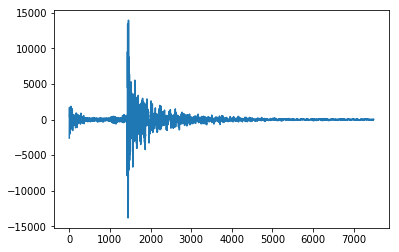

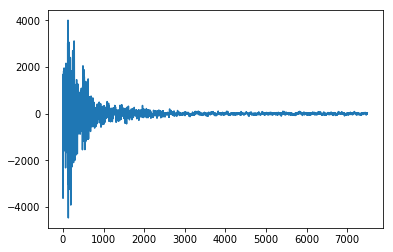

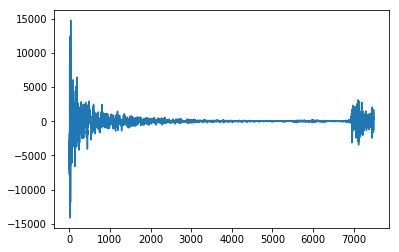

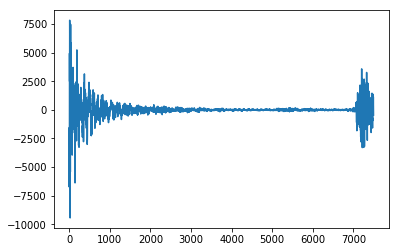

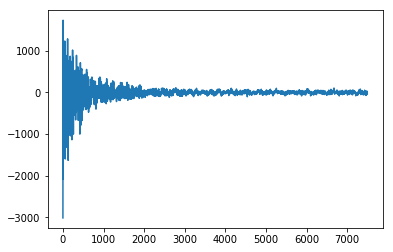

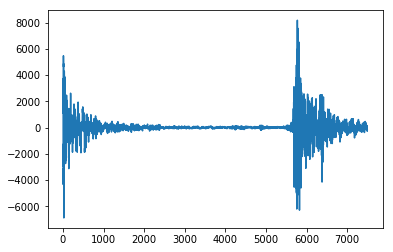

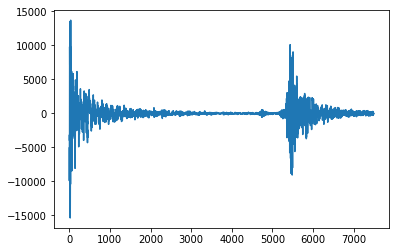

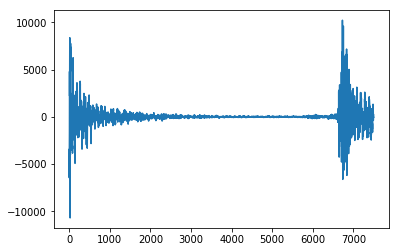

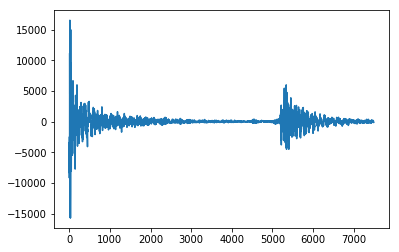

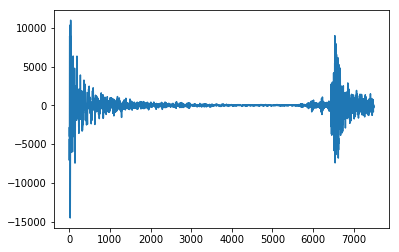

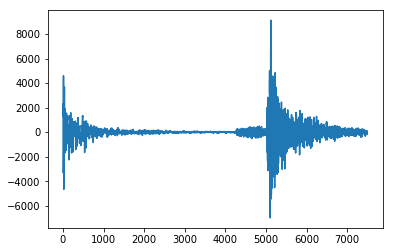

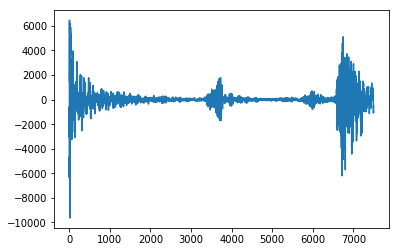

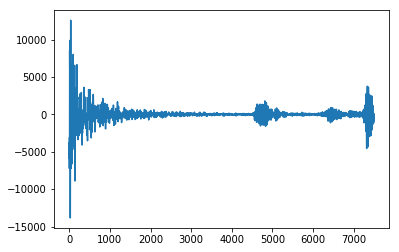

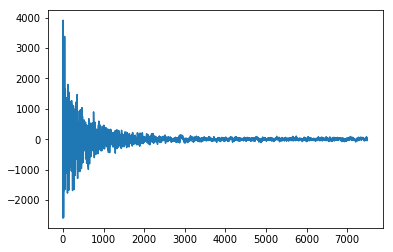

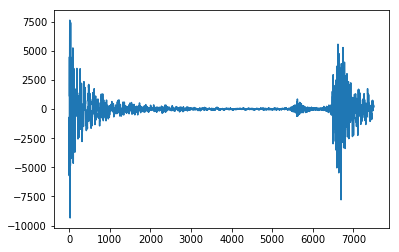

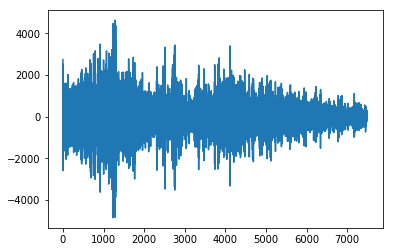

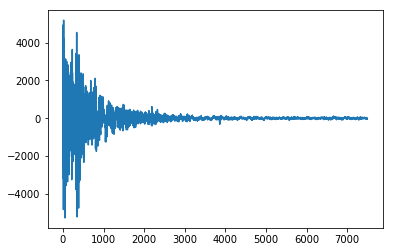

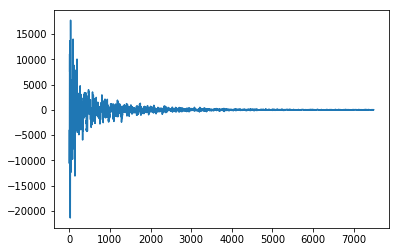

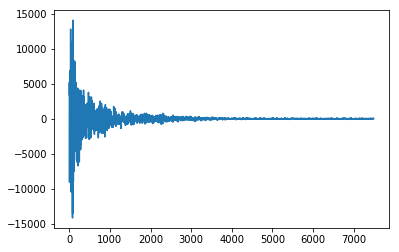

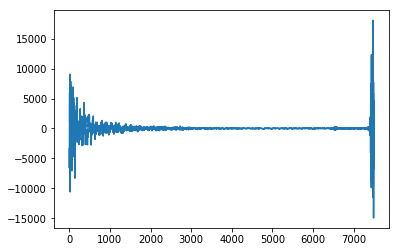

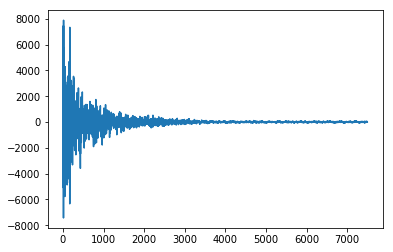

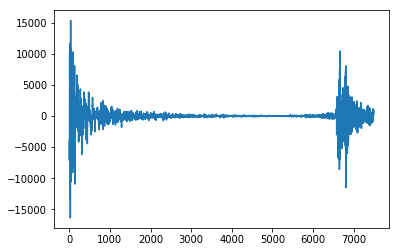

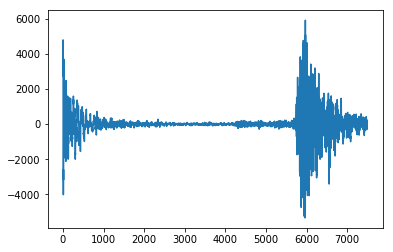

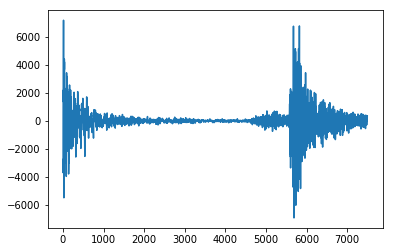

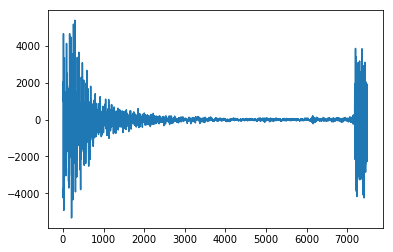

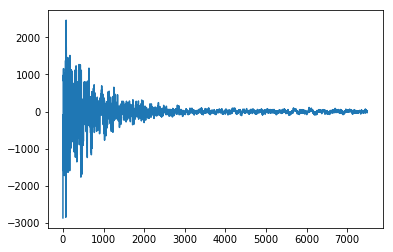

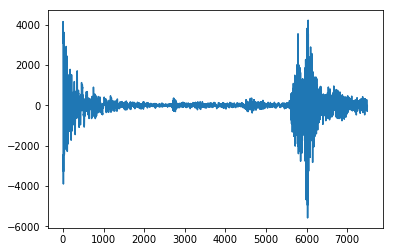

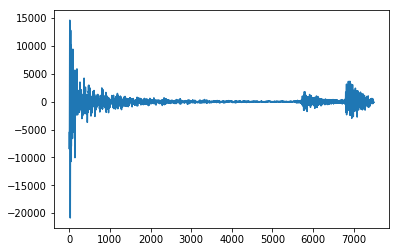

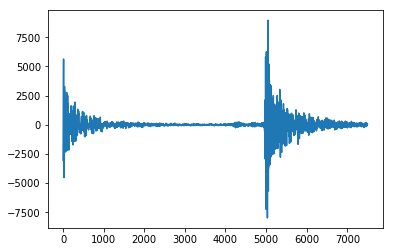

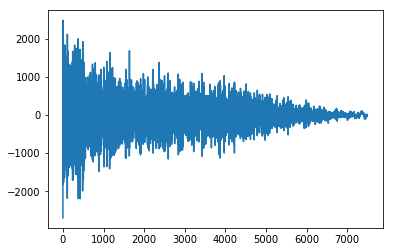

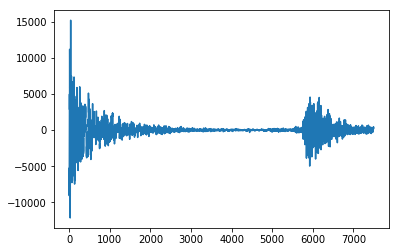

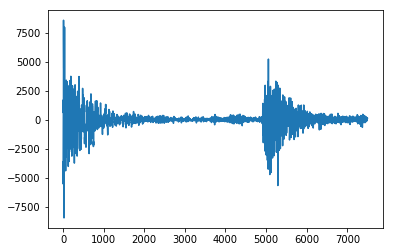

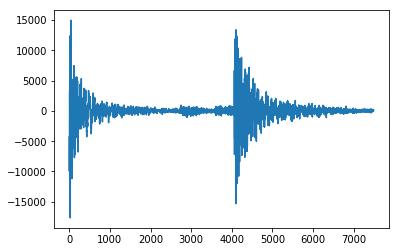

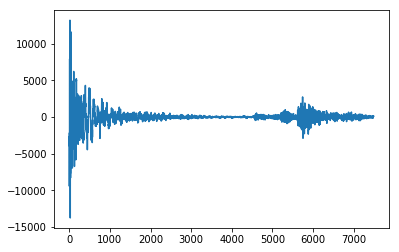

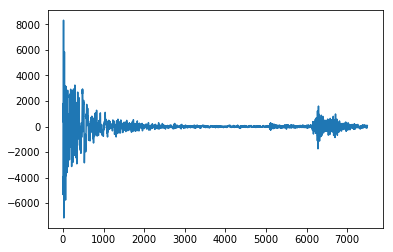

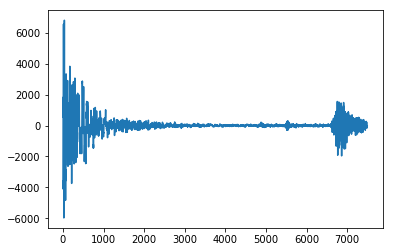

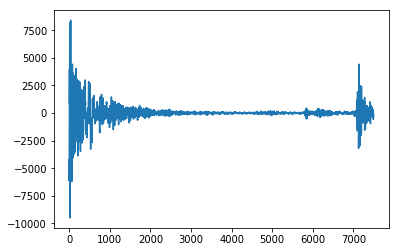

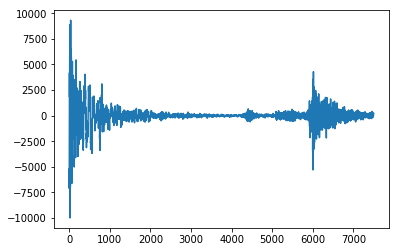

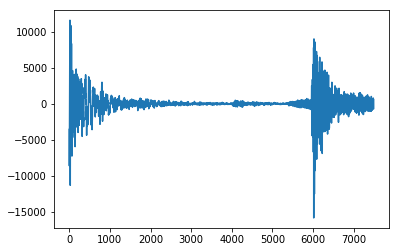

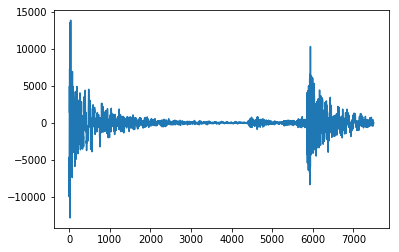

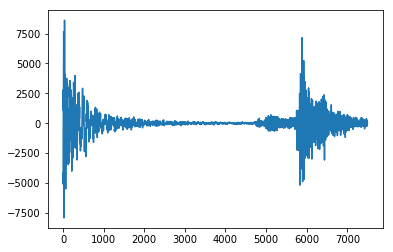

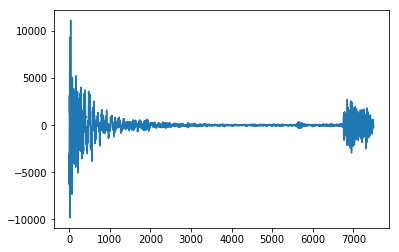

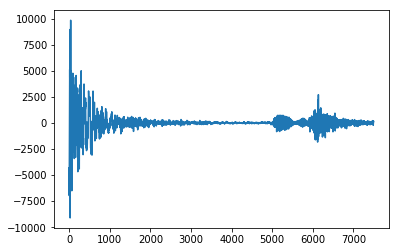

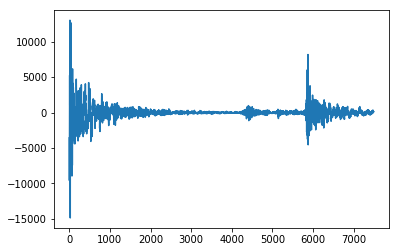

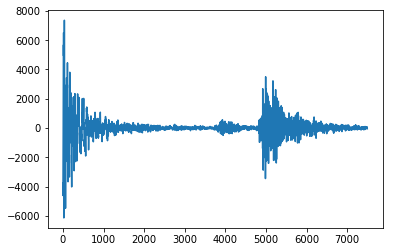

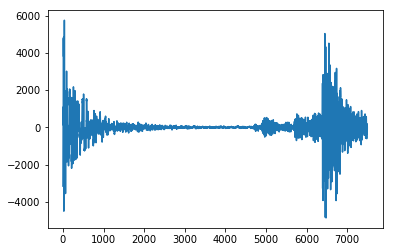

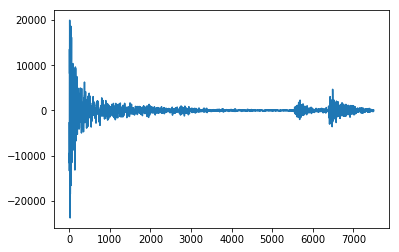

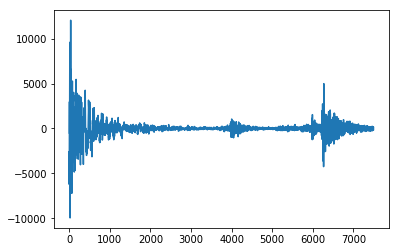

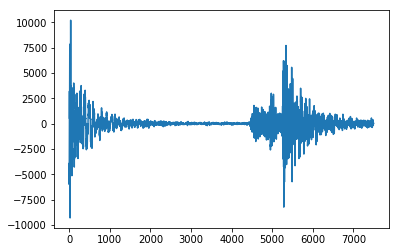

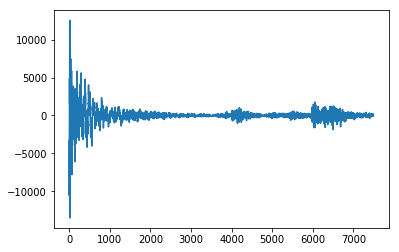

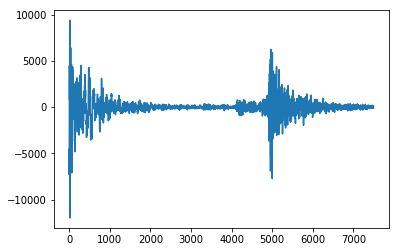

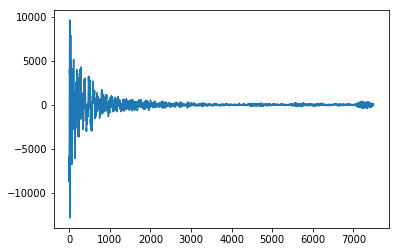

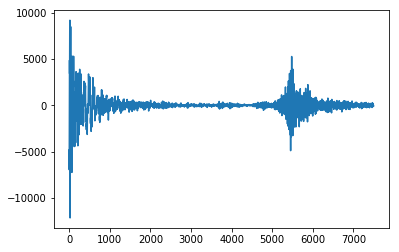

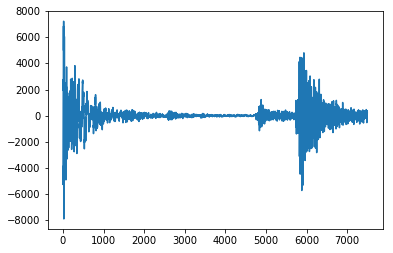

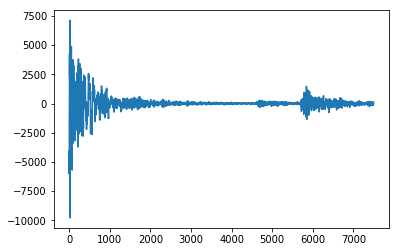

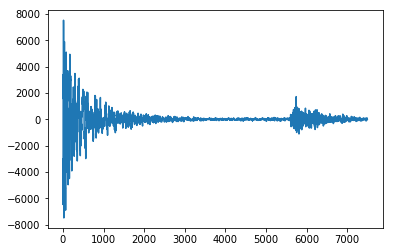

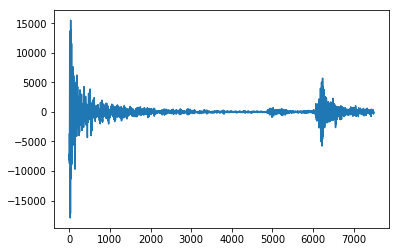

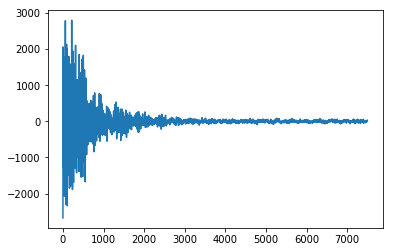

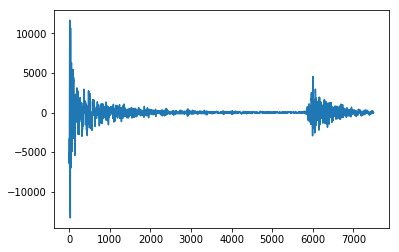

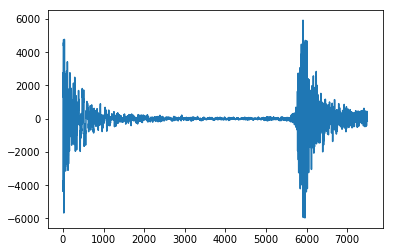

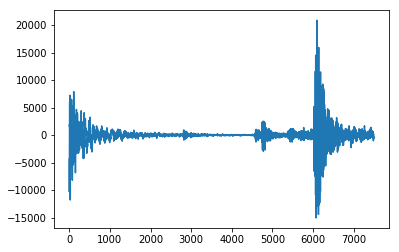

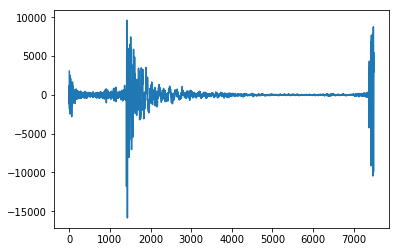

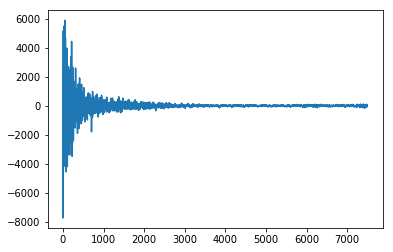

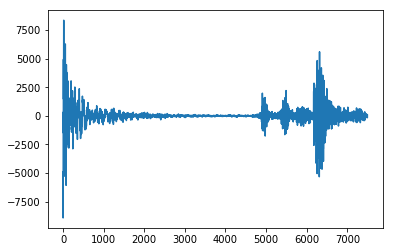

In [306]:
keystrokes = extract_keystrokes(spacebar_training)
for keystroke in keystrokes:
    plt.plot(keystroke)
    plt.show()

## Collecting training data